# Random Forest Classifier with Wine Dataset
This notebook demonstrates how to use a Random Forest algorithm on the Wine dataset. We will cover:
- Loading and exploring the dataset
- Training a Random Forest classifier
- Visualizing feature importance
- Comparing performance with a single decision tree

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore the Wine Dataset
The Wine dataset contains chemical analysis results of wines grown in the same region in Italy but derived from three different cultivars.

In [2]:
# Load the dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Split the Data
We split the data into training and testing sets to evaluate the model's performance.

In [3]:
# Split the data
X = df[data.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
We train a Random Forest classifier on the training data.

In [4]:
# Train the Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Feature Importance
Random forests can estimate the importance of each feature in making predictions. Let's visualize the feature importances.

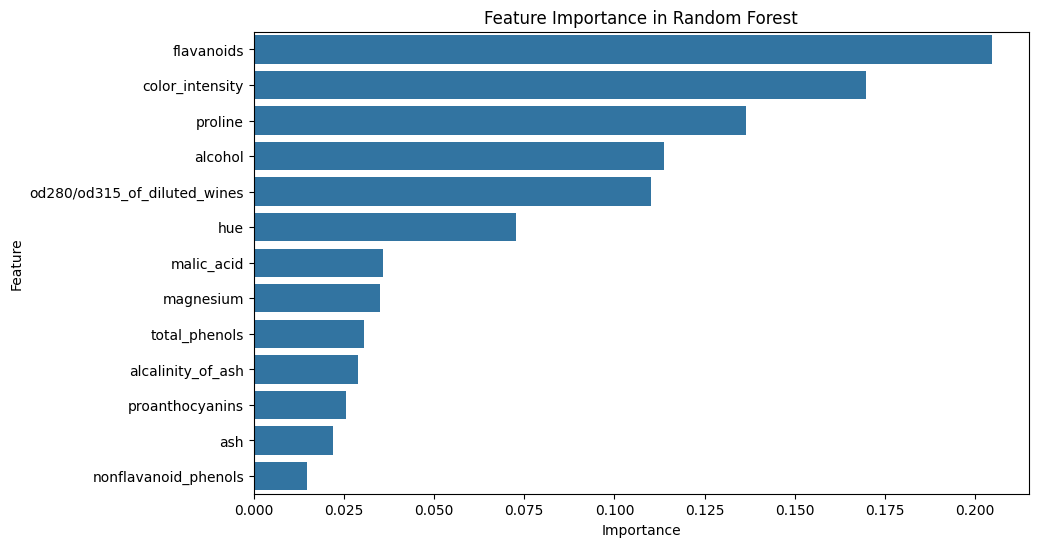

In [5]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=data.feature_names)
importances = importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Model Evaluation
Evaluate the model's performance on the test set.

In [6]:
# Predict and evaluate
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 1.0
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# Compare with a Single Decision Tree
Let's compare the performance of the Random Forest with a single Decision Tree classifier.

In [7]:
# Train and evaluate a single Decision Tree
single_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
single_tree.fit(X_train, y_train)
y_pred_tree = single_tree.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree, target_names=data.target_names))

Decision Tree Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

